In [1]:
from model_lomba import *
import matplotlib.pyplot as plt

map_width = 50
map_height = 50
moore = False
model = switching_model(num_of_motorist=50,num_of_stations=10,inv_size=10,cp_size= 10,width=map_width,height=map_height,moore=moore, configuration="more")

#Dalam menit
num_of_step = 30*24*60
#num_of_step = 100
for i in range(num_of_step):
    model.step()

13


In [2]:
#Ambil data agent
agent_data = model.datacollector.get_agent_vars_dataframe()
agent_data.head()

MemoryError: Unable to allocate 615. MiB for an array with shape (5, 16113600) and data type float64

In [ ]:
motorist_alive = agent_data.xs(num_of_step-1,level = "Step")["Alive"]
motorist_id = []
for motor in model.motorists:
    motorist_id.append(motor.unique_id)
motorist_alive[motorist_id]

AgentID
250    False
251    False
252    False
253    False
254    False
255    False
256    False
257    False
258    False
259    False
260    False
261    False
262    False
263    False
264    False
265    False
266    False
267    False
268    False
269    False
270    False
271    False
272    False
273    False
274    False
275    False
276    False
277    False
278    False
279    False
280    False
281    False
282    False
283    False
284    False
285    False
286    False
287    False
288    False
289    False
290    False
291    False
292    False
293    False
294    False
295    False
296    False
297    False
298    False
299    False
Name: Alive, dtype: object

In [ ]:

agent_pos = agent_data.xs(0,level = "Step")["Position"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_pos = agent_pos[station_id]
print(station_pos)

AgentID
300      (0, 0)
301     (49, 0)
302     (0, 49)
303    (49, 49)
304    (24, 24)
305     (24, 0)
306    (24, 49)
307     (0, 24)
308    (49, 24)
309    (11, 11)
310    (11, 36)
311    (36, 11)
312    (36, 36)
Name: Position, dtype: object


In [ ]:
step_station = num_of_step-1
#step_station = 0
agent_full = agent_data.xs(step_station,level = "Step")["Full_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_full = agent_full[station_id]
print(station_full)

AgentID
300    10.0
301    10.0
302    10.0
303    10.0
304    10.0
305    10.0
306    10.0
307    10.0
308    10.0
309    10.0
310     0.0
311     0.0
312     0.0
Name: Full_battery, dtype: float64


In [ ]:
agent_empty = agent_data.xs(step_station,level = "Step")["Empty_battery"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_empty = agent_empty[station_id]
print(station_empty)

AgentID
300    0.0
301    0.0
302    0.0
303    0.0
304    0.0
305    0.0
306    0.0
307    0.0
308    0.0
309    0.0
310    0.0
311    0.0
312    0.0
Name: Empty_battery, dtype: float64


In [ ]:
agent_cp_full = agent_data.xs(step_station,level = "Step")["CP_full"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_full = agent_cp_full[station_id]
print(station_cp_full)

AgentID
300    10.0
301    10.0
302    10.0
303    10.0
304    10.0
305    10.0
306    10.0
307    10.0
308    10.0
309    10.0
310     0.0
311     0.0
312     0.0
Name: CP_full, dtype: float64


In [ ]:
agent_cp_empty = agent_data.xs(step_station,level = "Step")["CP_empty"]
station_id = []
for stat in model.stations:
    station_id.append(stat.unique_id)
station_cp_empty = agent_cp_empty[station_id]
print(station_cp_empty)

AgentID
300    0.0
301    0.0
302    0.0
303    0.0
304    0.0
305    0.0
306    0.0
307    0.0
308    0.0
309    0.0
310    0.0
311    0.0
312    0.0
Name: CP_empty, dtype: float64


In [ ]:
#Ambil data motorist
driver_num = 1
motorist_pos = agent_data.xs(model.motorists[driver_num].unique_id, level = "AgentID")["Position"]
motorist_pos.head()
motorist_pos.tail()

Step
43195    (24, 30)
43196    (24, 30)
43197    (24, 30)
43198    (24, 30)
43199    (24, 30)
Name: Position, dtype: object

Text(0, 0.5, 'y')

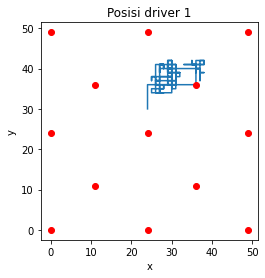

In [ ]:
#Coba plot posisi
x_coor = []
y_coor = []
for coor in motorist_pos:
    x_coor.append(coor[0])
    y_coor.append(coor[1])



plt.plot(x_coor,y_coor)
for i in range(model.num_of_stations):
    plt.plot(model.stations[i].pos[0],model.stations[i].pos[1],color = "red", marker = 'o')
plt.xlim([0,map_width])
plt.ylim([0,map_height])
plt.title('Posisi driver ' + str(driver_num))
plt.axis('scaled')
plt.xlabel('x')
plt.ylabel('y')

<AxesSubplot:xlabel='Step'>

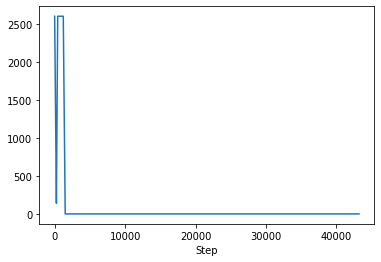

In [ ]:
#Cek baterai
battery_id = 0
battery_energy = agent_data.xs(battery_id, level = "AgentID")["Charge"]
battery_energy.plot()



In [ ]:
model_data = model.datacollector.get_model_vars_dataframe()
model_data.tail()

,num_of_alive
43195,0
43196,0
43197,0
43198,0
43199,0


Text(0.5, 0, 'Steps')

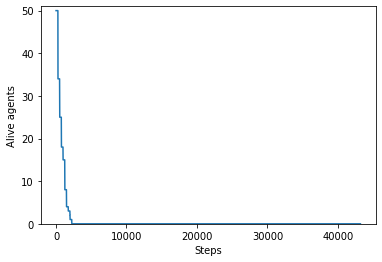

In [ ]:
plt.plot(model_data)
plt.ylim([0,51])
plt.ylabel("Alive agents")
plt.xlabel("Steps")

In [ ]:
a = [1,2,3]
b = a
b.remove(3)
print(a)

[1, 2]
